
0: 640x640 4 Stage1s, 24.0ms
Speed: 7.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict5


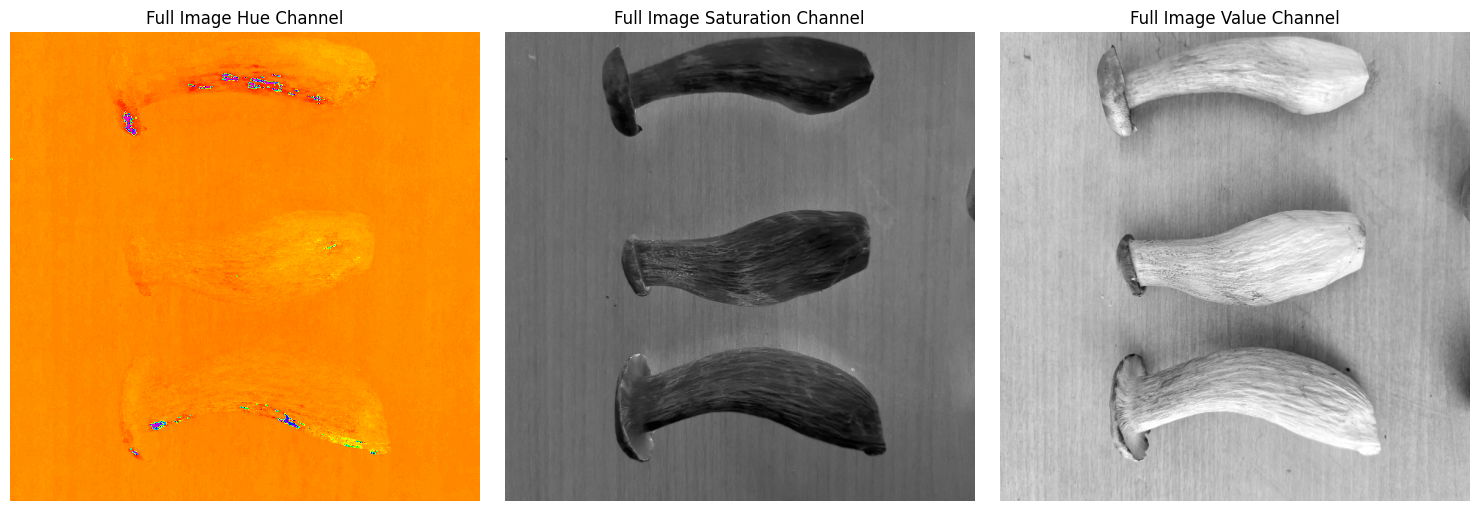

area 31156.5


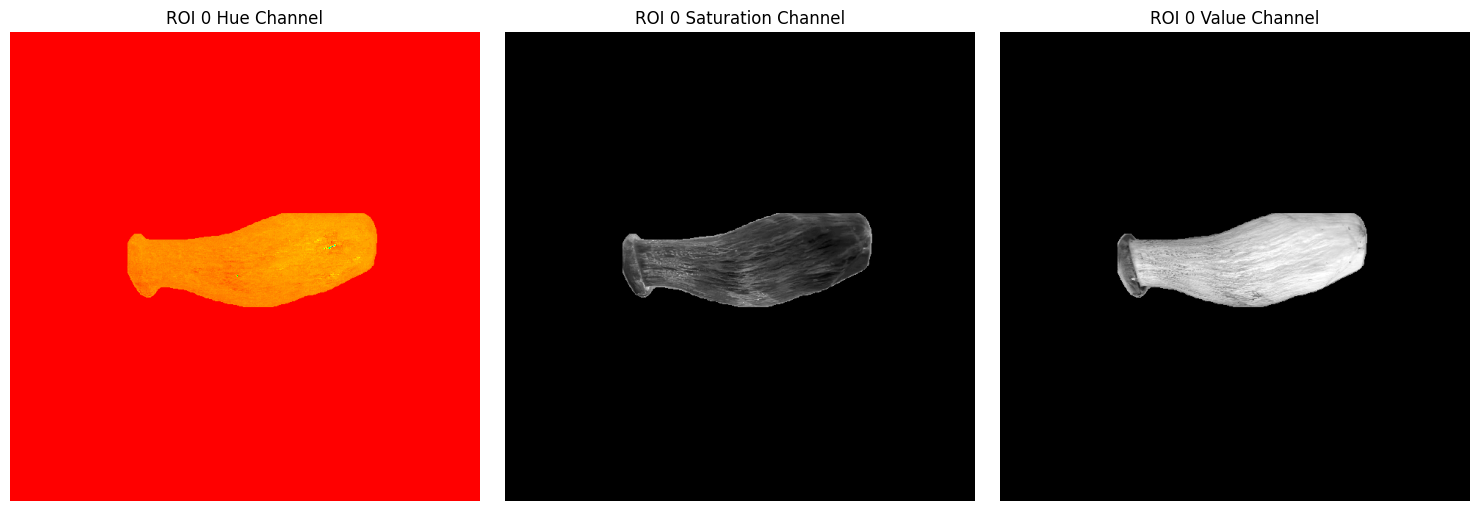

area 35745.0


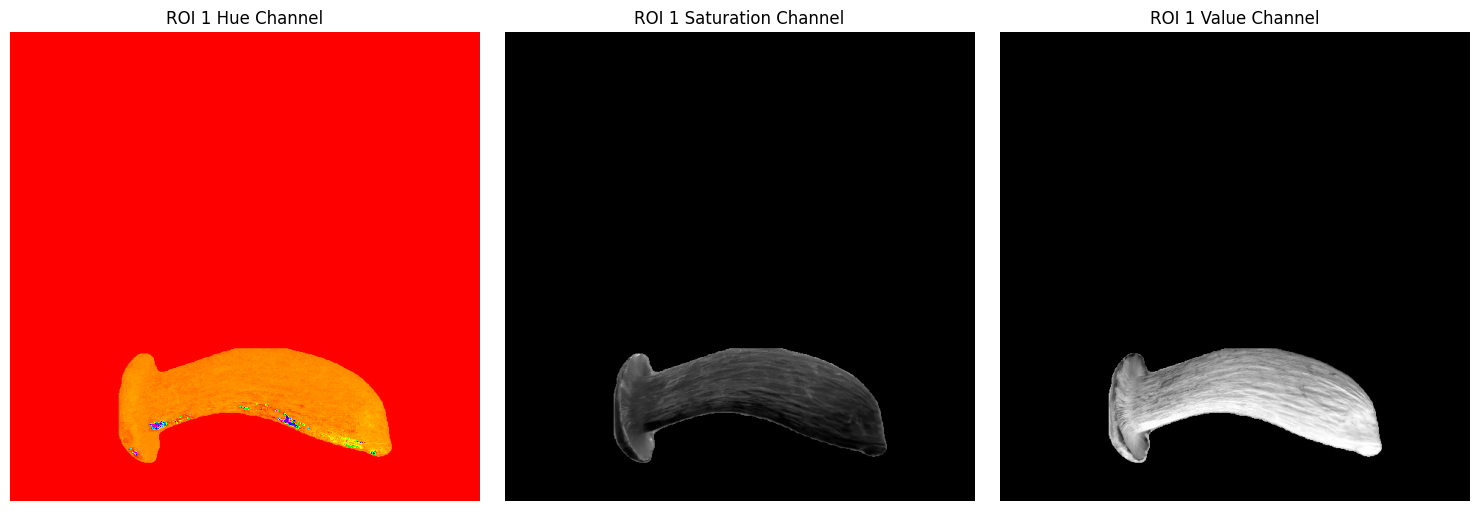

area 28730.5


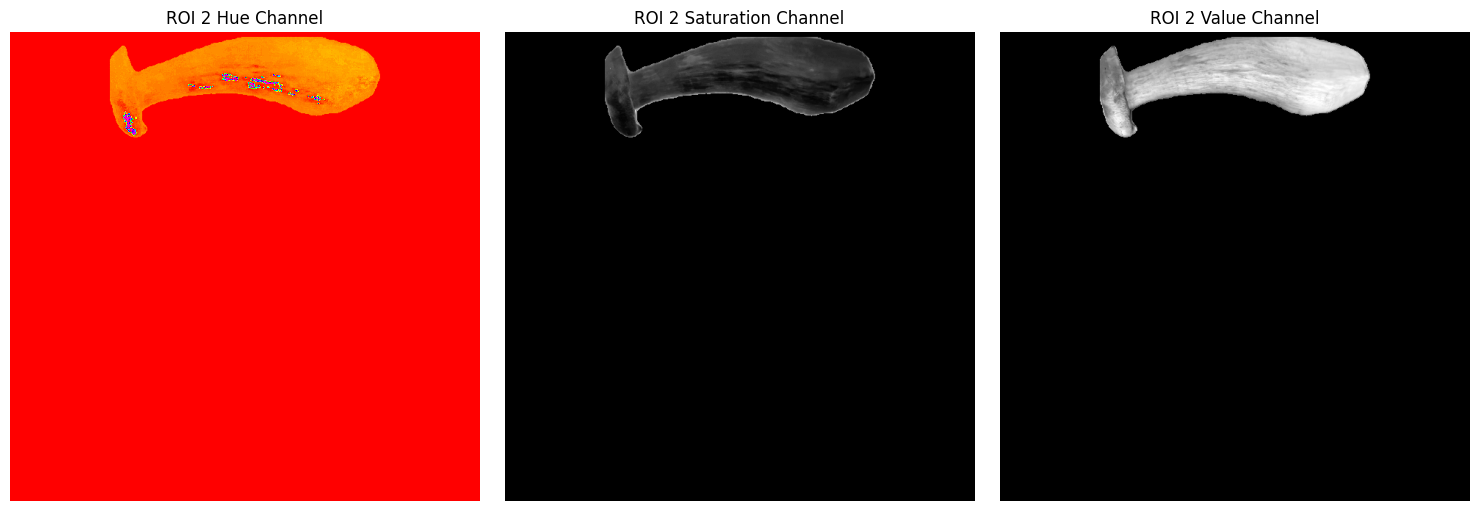

area 658.0


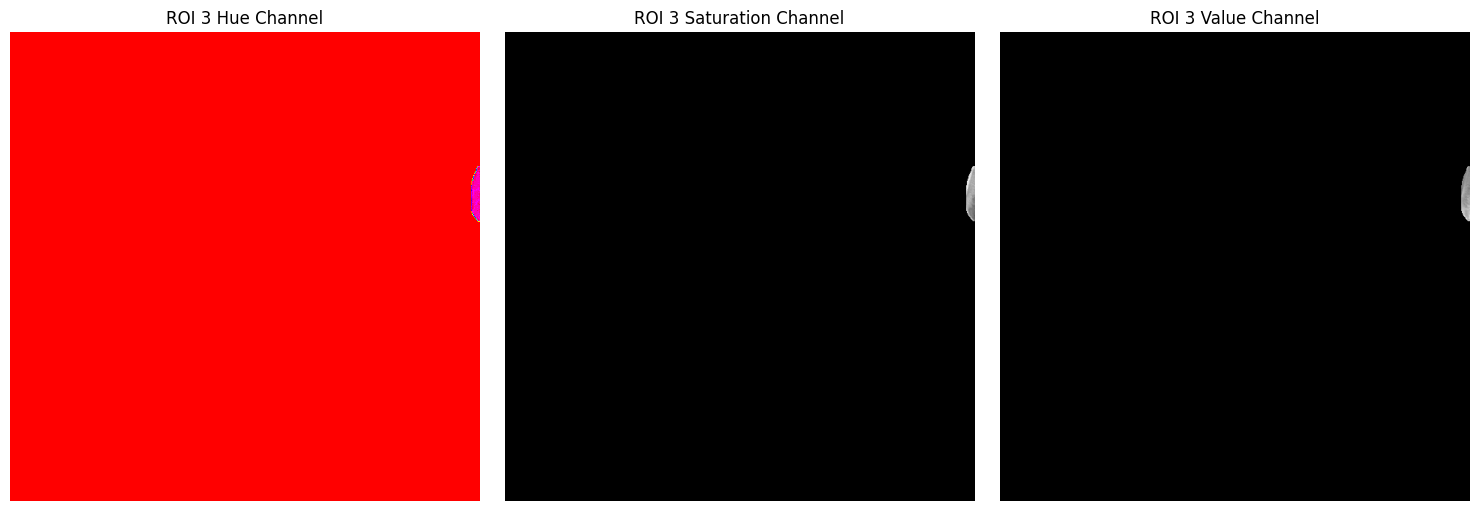

Saved image with contours to runs/segment/predict/p4.jpg
Saved HSV image to hsv_image.jpg


In [31]:
import numpy as np
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 初始化YOLO模型
yolo = YOLO("runs/train/exp-seg-goldyolo-asf/weights/best.pt", task="detect")

# 读取源图像
source = cv2.imread('F:/yolo/ultralytics-20240513/ultralytics-main/datasets/mogu_labels_2/images/train/1_20240529_135303.jpg')
source = cv2.resize(source, (640, 640))

# 进行目标检测
result = yolo(source, save=True)

# 转换原图像到HSV颜色空间
source_hsv = cv2.cvtColor(source, cv2.COLOR_BGR2HSV)
h_source, s_source, v_source = cv2.split(source_hsv)

# 输出整个图像的HSV分量
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(h_source, cmap='hsv')
plt.title('Full Image Hue Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(s_source, cmap='gray')
plt.title('Full Image Saturation Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(v_source, cmap='gray')
plt.title('Full Image Value Channel')
plt.axis('off')

plt.tight_layout()
plt.savefig('full_image_hsv_channels.png')
plt.show()

# 检查是否有掩码数据
if result[0].masks is not None and len(result[0].masks) > 0:
    masks_data = result[0].masks.data
    for index, mask in enumerate(masks_data):
        mask = (mask.cpu().numpy() * 255).astype(np.uint8)  # 转换为uint8类型
        ret, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
        
        # 找到掩码的轮廓
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(source, contours, -1, (0, 0, 255), 2)
        area = cv2.contourArea(contours[0])
        print('area', area)

        # 创建掩码的三通道版本
        mask_3d = cv2.merge([binary_mask, binary_mask, binary_mask])

        # 使用掩码将感兴趣区域遮罩出来
        roi_hsv = cv2.bitwise_and(source_hsv, mask_3d)

        # 分离ROI的HSV通道
        h_roi, s_roi, v_roi = cv2.split(roi_hsv)

        # 输出ROI的HSV分量图片
        plt.figure(figsize=(15, 5))
        
        plt.subplot(131)
        plt.imshow(h_roi, cmap='hsv')
        plt.title(f'ROI {index} Hue Channel')
        plt.axis('off')
        
        plt.subplot(132)
        plt.imshow(s_roi, cmap='gray')
        plt.title(f'ROI {index} Saturation Channel')
        plt.axis('off')
        
        plt.subplot(133)
        plt.imshow(v_roi, cmap='gray')
        plt.title(f'ROI {index} Value Channel')
        plt.axis('off')
        
        plt.tight_layout()
        plt.savefig(f'roi_hsv_channels_{index}.png')
        plt.show()

    # 保存带有轮廓的源图像
    result_filename = 'runs/segment/predict/p4.jpg'
    cv2.imwrite(result_filename, source)
    print(f'Saved image with contours to {result_filename}')
    
else:
    print("No masks found in the result")

# 保存HSV图像
cv2.imwrite('hsv_image.jpg', source_hsv)
print(f'Saved HSV image to hsv_image.jpg')

In [32]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Stage1', 1: 'Stage2', 2: 'Stage3', 3: 'Stage4'}
obb: None
orig_img: array([[[107, 151, 192],
        [111, 160, 200],
        [105, 149, 190],
        ...,
        [ 91, 136, 169],
        [ 90, 137, 169],
        [ 87, 134, 165]],

       [[108, 153, 191],
        [111, 158, 196],
        [107, 153, 191],
        ...,
        [ 84, 130, 163],
        [ 85, 132, 163],
        [ 88, 134, 165]],

       [[104, 149, 187],
        [111, 158, 196],
        [111, 158, 196],
        ...,
        [ 92, 137, 170],
        [ 91, 138, 170],
        [ 90, 137, 168]],

       ...,

       [[115, 163, 200],
        [113, 159, 196],
        [120, 165, 202],
        ...,
        [129, 167, 199],
        [126, 167, 199],
        [130, 170, 199]],

       [[117, 167, 203],
        [116, 164, 200],
        [122, 167, 206],
  


0: 640x640 13 Stage1s, 67.0ms
Speed: 3.0ms preprocess, 67.0ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict10
Saved image with contours to runs/segment/predict/p4_with_contours.jpg


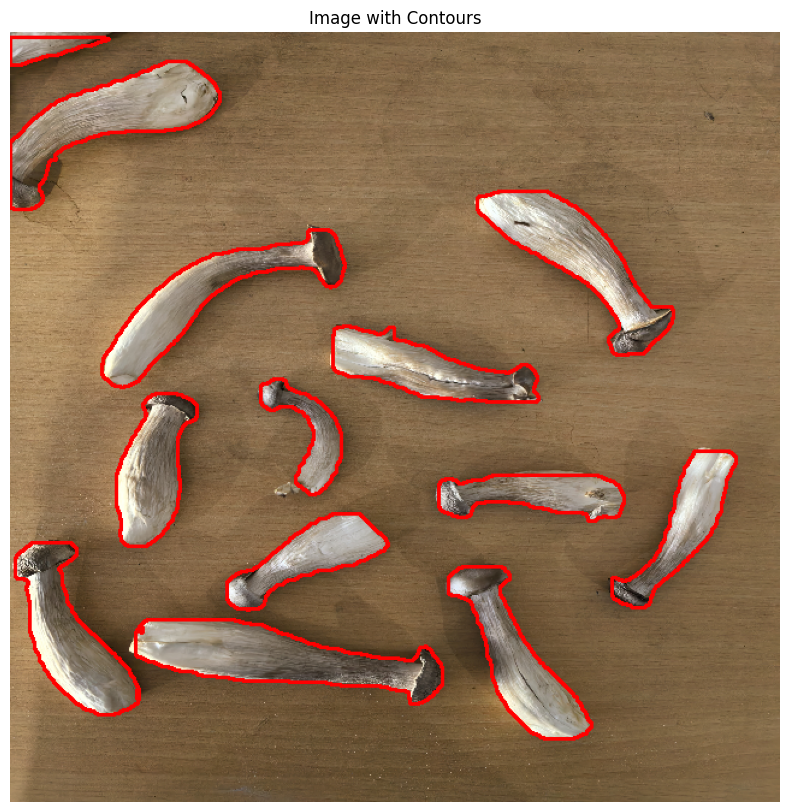

In [40]:
import numpy as np
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 初始化YOLO模型
yolo = YOLO("runs/train/exp-seg-goldyolo-asf/weights/best.pt", task="detect")

# 读取源图像
source = cv2.imread('F:/yolo/ultralytics-20240513/ultralytics-main/datasets/mogu_labels_2/images/train/7_20240529_132501.jpg')
source = cv2.resize(source, (640, 640))

# 进行目标检测
result = yolo(source, save=True)

# 检查是否有掩码数据
if result[0].masks is not None and len(result[0].masks) > 0:
    masks_data = result[0].masks.data
    for index, mask in enumerate(masks_data):
        mask = (mask.cpu().numpy() * 255).astype(np.uint8)  # 转换为uint8类型
        ret, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

        # 找到掩码的轮廓
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(source, contours, -1, (0, 0, 255), 2)  # 用红色绘制轮廓

    # 保存带有轮廓的源图像
    result_filename = 'runs/segment/predict/p4_with_contours.jpg'
    cv2.imwrite(result_filename, source)
    print(f'Saved image with contours to {result_filename}')

    # 显示带有轮廓的图像
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
    plt.title('Image with Contours')
    plt.axis('off')
    plt.show()
    
else:
    print("No masks found in the result")

In [34]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.9329, 0.9292, 0.9274, 0.2992], device='cuda:0')
data: tensor([[1.5858e+02, 2.4477e+02, 4.9737e+02, 3.7741e+02, 9.3293e-01, 0.0000e+00],
        [1.4706e+02, 4.2809e+02, 5.1993e+02, 5.8800e+02, 9.2919e-01, 0.0000e+00],
        [1.3323e+02, 7.0136e+00, 5.0006e+02, 1.4513e+02, 9.2739e-01, 0.0000e+00],
        [6.2707e+02, 1.8154e+02, 6.3972e+02, 2.5969e+02, 2.9925e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([4, 6])
xywh: tensor([[327.9753, 311.0897, 338.7816, 132.6489],
        [333.4987, 508.0456, 372.8705, 159.9025],
        [316.6443,  76.0737, 366.8326, 138.1202],
        [633.3938, 220.6142,  12.6455,  78.1445]], device='cuda:0')
xywhn: tensor([[0.5125, 0.4861, 0.5293, 0.2073],
        [0.5211, 0.7938, 0.5826, 0.2498],
        [0.4948, 0.1189, 0.5732, 0.2158],
        [0.9897, 0.3447, 0.0198, 0.1221]], devic

In [35]:
result[0].masks.xy

[array([[        369,         248],
        [        368,         249],
        [        366,         249],
        [        365,         250],
        [        364,         250],
        [        363,         251],
        [        362,         251],
        [        361,         252],
        [        356,         252],
        [        355,         253],
        [        353,         253],
        [        351,         255],
        [        349,         255],
        [        348,         256],
        [        344,         256],
        [        343,         257],
        [        342,         257],
        [        340,         259],
        [        338,         259],
        [        337,         260],
        [        334,         260],
        [        333,         261],
        [        332,         261],
        [        330,         263],
        [        329,         263],
        [        328,         264],
        [        325,         264],
        [        324,       